<a href="https://colab.research.google.com/github/m-njera/DP/blob/master/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
print(tf.__version__)

1.15.0


<h3>Loading in the data</h3>

In [0]:
movies_df = pd.read_csv("Recommander-System-RBM-/ml-1m/movies.dat",sep="::",encoding="latin-1",engine="python",header=None)

In [0]:
#movies_df = pd.read_csv("./ml-1m/movies.dat",sep = '::',header = None,engine= 'python')
movies_df.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
ratings_df = pd.read_csv("Recommander-System-RBM-/ml-1m/ratings.dat",sep="::",encoding="latin-1",engine="python",header=None)

In [0]:

ratings_df.head()

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [0]:
movies_df.columns = ['MovieID', 'Title', 'Genres']
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [0]:
len(movies_df)

3883

<h4>Formatting the data into input for the RBM</h4>

In [0]:
user_rating_df = ratings_df.pivot(index='UserID', columns='MovieID', values='Rating')
user_rating_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,4.0,NaN,3.0,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Normalize</h3>

In [0]:
norm_user_rating_df = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating_df.values
trX[0:5]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
trX.shape

(6040, 3706)

<h4>Model's Parameter

In [0]:
hiddenUnits = 100
visibleUnits =  len(user_rating_df.columns)
vb = tf.placeholder("float", [visibleUnits]) 
hb = tf.placeholder("float", [hiddenUnits]) 
W = tf.placeholder("float", [visibleUnits, hiddenUnits])

In [0]:
#Phase 1: Input Processing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))
#Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

<h4>Training parameter and function</h4

In [0]:
alpha = 0.01
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

Instructions for updating:
Use `tf.cast` instead.


In [0]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

In [0]:
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
cur_vb = np.zeros([visibleUnits], np.float32)
cur_hb = np.zeros([hiddenUnits], np.float32)
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
prv_vb = np.zeros([visibleUnits], np.float32)
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())


Epoch: 0 reconstruction error: 0.271512
Epoch: 1 reconstruction error: 0.182356
Epoch: 2 reconstruction error: 0.153647
Epoch: 3 reconstruction error: 0.141521
Epoch: 4 reconstruction error: 0.134481
Epoch: 5 reconstruction error: 0.129641
Epoch: 6 reconstruction error: 0.125140
Epoch: 7 reconstruction error: 0.121673
Epoch: 8 reconstruction error: 0.117772
Epoch: 9 reconstruction error: 0.114491
Epoch: 10 reconstruction error: 0.111707
Epoch: 11 reconstruction error: 0.108847
Epoch: 12 reconstruction error: 0.106068
Epoch: 13 reconstruction error: 0.103298
Epoch: 14 reconstruction error: 0.100445


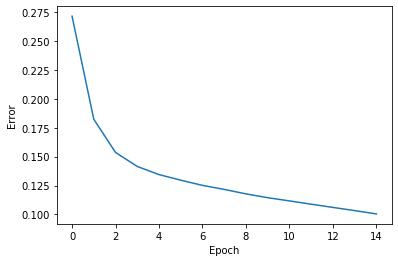

In [0]:
epochs = 15
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
    print ('Epoch: %d' % i,'reconstruction error: %f' % errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

<h3>Recommendation</h3>

In [0]:
mock_user_id = 215

In [0]:
inputUser = trX[mock_user_id-1].reshape(1, -1)
inputUser

array([[0.8, 0. , 0. , ..., 0. , 0. , 0. ]])

In [0]:
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={ v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})
print(rec)

[[0.46595272 0.09336171 0.05675495 ... 0.01411089 0.0118563  0.07264744]]


In [0]:
scored_movies_df_mock = movies_df[movies_df['MovieID'].isin(user_rating_df.columns)]
scored_movies_df_mock = scored_movies_df_mock.assign(RecommendationScore = rec[0])
scored_movies_df_mock.sort_values(["RecommendationScore"], ascending=False)

,MovieID,Title,Genres,RecommendationScore
1178,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,1.000000
2789,2858,American Beauty (1999),Comedy|Drama,1.000000
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1.000000
1192,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,0.872311
1959,2028,Saving Private Ryan (1998),Action|Drama|War,0.871085
...,...,...,...,...
3416,3485,Autopsy (Macchie Solari) (1975),Horror,0.008180
597,601,"Wooden Man's Bride, The (Wu Kui) (1994)",Drama,0.008120
2523,2592,"Joyriders, The (1999)",Drama,0.008097
2138,2207,Jamaica Inn (1939),Drama,0.008096


All the movies that our mock user has watched before:

In [0]:
movies_df_mock = ratings_df[ratings_df['UserID'] == mock_user_id]
len(movies_df_mock)

34

In [0]:
merged_df_mock = scored_movies_df_mock.merge(movies_df_mock, on='MovieID', how='outer')
merged_df_mock.sort_values(by=['RecommendationScore'], ascending=False).head(20)

,MovieID,Title,Genres,RecommendationScore,UserID,Rating,Timestamp
1106,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,1.000000,NaN,NaN,NaN
2651,2858,American Beauty (1999),Comedy|Drama,1.000000,NaN,NaN,NaN
253,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1.000000,215.0,5.0,976899190.0
1120,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,0.872311,215.0,5.0,976899689.0
1848,2028,Saving Private Ryan (1998),Action|Drama|War,0.871085,NaN,NaN,NaN
2374,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,0.724272,NaN,NaN,NaN
1108,1198,Raiders of the Lost Ark (1981),Action|Adventure,0.695401,NaN,NaN,NaN
2557,2762,"Sixth Sense, The (1999)",Thriller,0.678701,NaN,NaN,NaN
575,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,0.655084,NaN,NaN,NaN
579,593,"Silence of the Lambs, The (1991)",Drama|Thriller,0.637364,NaN,NaN,NaN


In [0]:
merged_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)

,MovieID,Title,Genres,RecommendationScore,UserID,Rating,Timestamp
253,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,0.999673,215.0,5.0,976899190.0
1106,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,0.958881,NaN,NaN,NaN
1120,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,0.947814,215.0,5.0,976899689.0
2374,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,0.937207,NaN,NaN,NaN
2426,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Fantasy|Sci-Fi,0.885247,215.0,5.0,976908635.0
466,480,Jurassic Park (1993),Action|Adventure|Sci-Fi,0.843873,215.0,5.0,976899784.0
1449,1580,Men in Black (1997),Action|Adventure|Comedy|Sci-Fi,0.793294,NaN,NaN,NaN
1258,1356,Star Trek: First Contact (1996),Action|Adventure|Sci-Fi,0.790336,NaN,NaN,NaN
575,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,0.762575,NaN,NaN,NaN
1108,1198,Raiders of the Lost Ark (1981),Action|Adventure,0.729595,NaN,NaN,NaN


<h5>There are some movies that user has not watched yet and has high score based on our model. So, we can recommend them to the user.</h5>